# Data Cleaning and Pre-processing

## Steps:
- **Step 1**: Load the dataset.
- **Step 2**: Handle missing values.
- **Step 3**: Remove duplicates.
- **Step 4**: Handle outliers.
- **Step 5**: Encode categorical variables.
- **Step 6**: Scale numerical variables.
- **Step 7**: Split the data into training and testing sets.

# Exploratory Data Analysis (EDA)

## Graphs:
1. **Histogram**: To visualize the distribution of numerical variables.
2. **Bar Plot**: To visualize the distribution of categorical variables.
3. **Scatter Plot**: To explore the relationship between two numerical variables.
4. **Correlation Matrix**: To identify correlations between numerical variables.
5. **Box Plot**: To identify outliers.

# ML-Model Training and Evaluation

## Model:
- **Chosen Model**: Random Forest Regression.
- **Reason**: Random Forest can handle non-linear relationships and is robust to overfitting.
- **Accuracy**: Mean Squared Error (MSE), R-squared (R2).

## Hyperparameter Optimization and Feature Selection:
- **Grid Search**: Tuning hyperparameters for better model performance.
- **Feature Importance**: Determining the most important features using the built model.

## Model Deployment and ML-Flow:
- **ML-Flow**: Tracking model training process and parameters for reproducibility.
- **Deployment**: Deploying the trained model for inference in production.

# Model Interpretation and Feature Importance

## Explanation:
- **Feature Importance Plot**: Showing the importance of each feature in the model's predictions.
- **Interpretation**: Understanding which features have the most influence on the target variable.

# Future Steps:
- **Model Refinement**: Fine-tuning hyperparameters for better performance.
- **Feature Engineering**: Exploring additional features to improve model accuracy.
- **Model Monitoring**: Continuously monitoring model performance in production.


In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("./Data/car_price_prediction.csv")

In [3]:
data.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


The column 'ID' is unnecessary for the prediction, so the first step is to drop it.

In [4]:
data.drop('ID',axis=1,inplace=True)

In [5]:
data.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Same with Wheel column

In [6]:
data.drop('Wheel',axis=1,inplace=True)

In [7]:
data.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [8]:
data.head(1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Silver,12


We can check for missing values ('NaN') within the data. Once we've confirmed there are none, we can proceed to map the categorical columns

In [9]:
manufacturer_map = {manufacture : idx for idx,manufacture in enumerate (set(data.Manufacturer.unique()))}
model_map = {model : idx for idx,model in enumerate(set(data.Model.unique()))}
category_map = {category : idx for idx,category in enumerate(set(data.Category.unique()))}
interior_map = {interior : idx for idx,interior in enumerate(set(data["Leather interior"].unique()))}
engine_map = {engine : idx for idx,engine in enumerate(set(data['Fuel type'].unique()))}
boxType_map = {boxType :idx for idx,boxType in enumerate(set(data['Gear box type'].unique()))}
color_map = {color : idx for idx,color in enumerate(set(data.Color.unique()))}
drive_wheel_map = {dwheel : idx for idx,dwheel in enumerate(set(data['Drive wheels'].unique()))}
doors_map = {
    '02-Mar':3,
    '04-May':5,
    '>5':6

}


In [10]:
mileage_km = []
for km in data.Mileage.to_list():
    mileage_km.append(int(km.split("km")[0].split(" ")[0]))

In [11]:
int(data.Mileage.to_list()[0].split('km')[0].split(" ")[0])

186005

In [12]:
data2 = data.copy()

In [13]:
data2.shape

(19237, 16)

check for duplicates then drop it

In [14]:
data2.duplicated().sum()

3512

In [15]:
data.drop_duplicates(inplace=True)
data2.drop_duplicates(inplace=True)

In [16]:
data2['Manufacturer_map'] = data2['Manufacturer'].map(manufacturer_map)
data2['Model_map'] = data2['Model'].map(model_map)
data2['Category_map'] = data2['Category'].map(category_map)
data2['Leather interior_map'] = data2['Leather interior'].map(interior_map)
data2['Fuel type_map'] = data2['Fuel type'].map(engine_map)
data2['Gear box type_map'] = data2['Gear box type'].map(boxType_map)
data2['Color_map'] = data2['Color'].map(color_map)
data2['Drive wheels_map'] = data2['Drive wheels'].map(drive_wheel_map)
data2['Doors_map'] = data2['Doors'].map(doors_map)

In [17]:
data2.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Airbags,Manufacturer_map,Model_map,Category_map,Leather interior_map,Fuel type_map,Gear box type_map,Color_map,Drive wheels_map,Doors_map
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,...,12,10,459,10,0,0,0,6,1,5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,...,8,54,176,10,1,1,1,2,1,5


In [18]:
data2['Drive wheels_map'].unique()

array([1, 0, 2], dtype=int64)

In [19]:
data2.drop(['Manufacturer','Model','Category','Leather interior','Fuel type','Mileage','Gear box type','Color','Drive wheels','Levy','Doors'],axis=1,inplace=True)


In [20]:
data2.columns

Index(['Price', 'Prod. year', 'Engine volume', 'Cylinders', 'Airbags',
       'Manufacturer_map', 'Model_map', 'Category_map', 'Leather interior_map',
       'Fuel type_map', 'Gear box type_map', 'Color_map', 'Drive wheels_map',
       'Doors_map'],
      dtype='object')

In [21]:
tipos_de_datos = data2.dtypes
tipos_de_datos

Price                     int64
Prod. year                int64
Engine volume            object
Cylinders               float64
Airbags                   int64
Manufacturer_map          int64
Model_map                 int64
Category_map              int64
Leather interior_map      int64
Fuel type_map             int64
Gear box type_map         int64
Color_map                 int64
Drive wheels_map          int64
Doors_map                 int64
dtype: object

In [22]:
# data2[data2['Levy'] == '-'].count()

we should drop Levy too because have 5k nan dates

In [23]:
data2['Engine volume'] = data2['Engine volume'].apply(lambda x: x.split(" ")[0])

In [24]:
data2['Engine volume'] = data2['Engine volume'].astype(float)

In [25]:
print(data.shape)
print(data2.shape)

(15725, 16)
(15725, 14)


In [26]:
import os
import sys

# Agrega la ruta de la carpeta al sys.path
ruta_carpeta = os.path.abspath("librarys")  # Ruta absoluta de la carpeta "librarys"
sys.path.append(ruta_carpeta)

# Ahora puedes importar tu módulo desde la carpeta
import LibreriaUtilesMachineLearning as lb


Lets check correlation of data and data2

c:\Users\Danie\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


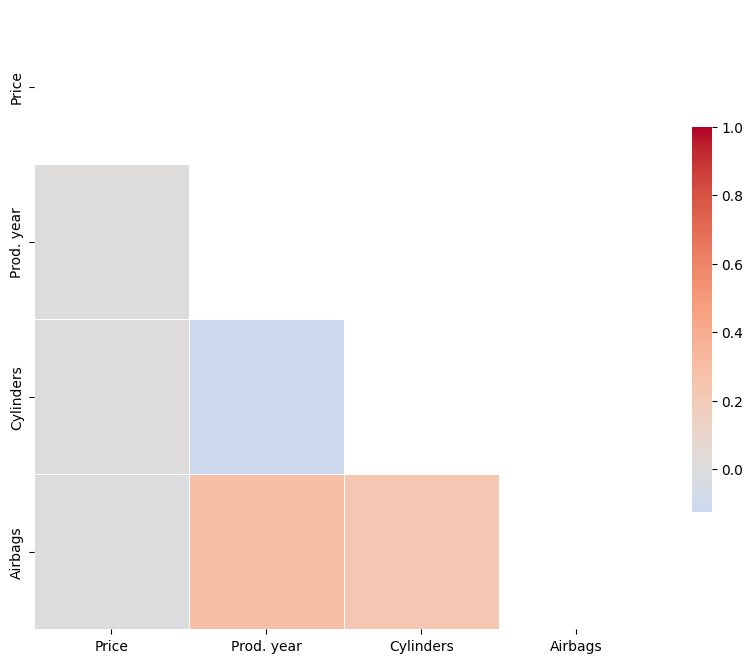

In [27]:
lb.correlacion(data,10,10)

c:\Users\Danie\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


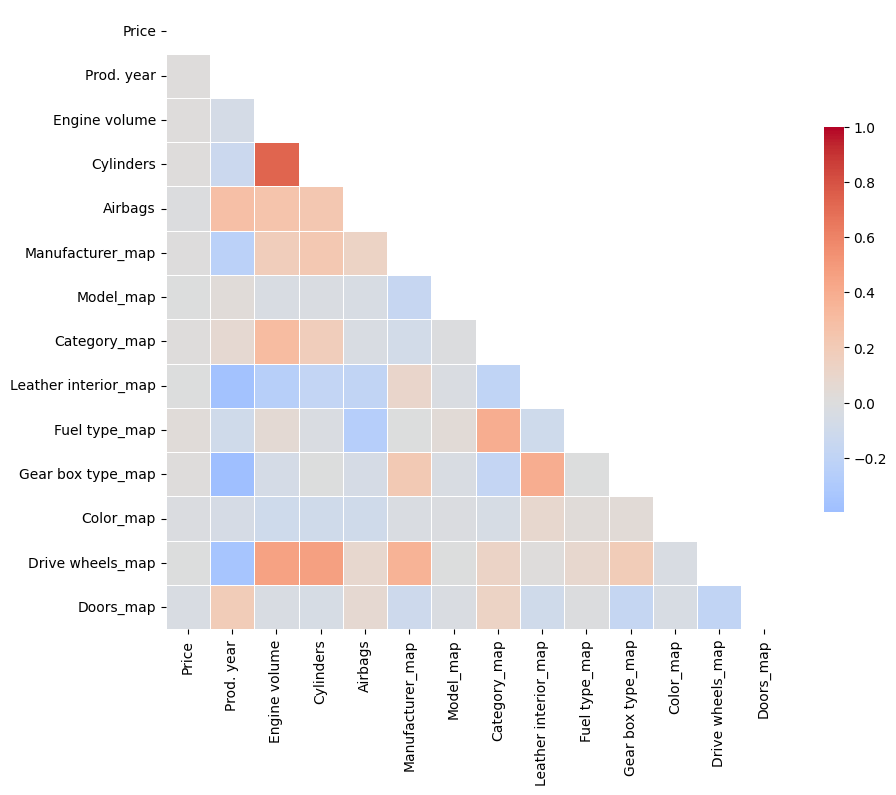

In [28]:
lb.correlacion(data2,10,10)

in both we have no correlation between columns

In [29]:
import matplotlib.pyplot as plt

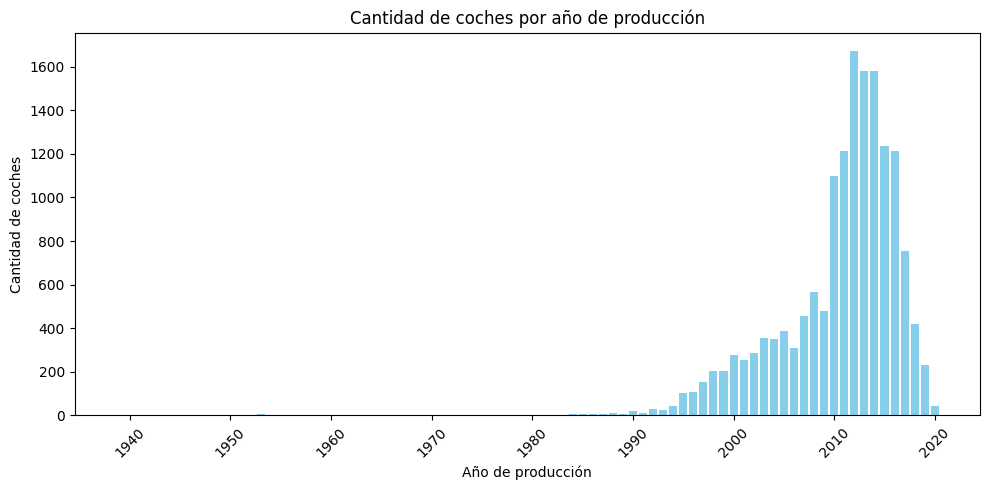

In [30]:

cantidad_por_año = data2.groupby('Prod. year').size().reset_index(name='count')

plt.figure(figsize=(10,5))  # Crear una nueva figura

# Crear el gráfico de barras
plt.bar(cantidad_por_año['Prod. year'], cantidad_por_año['count'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Año de producción')
plt.ylabel('Cantidad de coches')
plt.title('Cantidad de coches por año de producción')

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)  

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()       
plt.show()

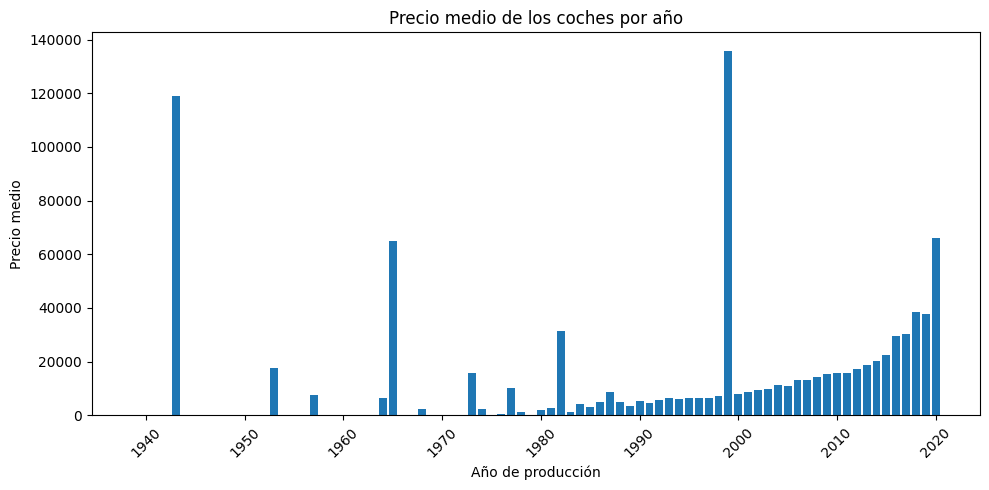

In [31]:
precio_medio_año = data2.groupby('Prod. year')['Price'].mean()
plt.figure(figsize=(10,5))

plt.bar(precio_medio_año.index,precio_medio_año.values)

plt.xlabel('Año de producción')
plt.ylabel('Precio medio')
plt.title('Precio medio de los coches por año')

plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()



In [32]:
data2['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973],
      dtype=int64)

In [33]:
data2[data2['Prod. year'] > 2000].shape

(14488, 14)

In [34]:
df_acotado = data2[data2['Prod. year']>2000]

In [35]:
df_acotado['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 2018, 2008, 2012, 2017,
       2001, 2009, 2019, 2015, 2004, 2005, 2003, 2002, 2020], dtype=int64)

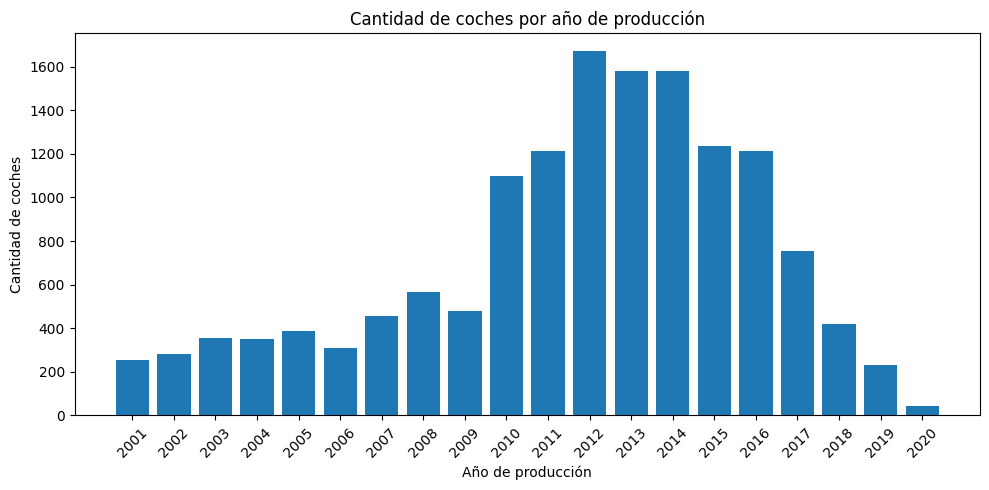

In [36]:
df_acotado_conteo = df_acotado.groupby('Prod. year').size().reset_index(name='count')
df_acotado_conteo['Prod. year'] = df_acotado_conteo['Prod. year'].astype(int)
fig = plt.figure(figsize=(10,5))

plt.bar(df_acotado_conteo['Prod. year'],df_acotado_conteo['count'])

# Añadir etiquetas y título
plt.xlabel('Año de producción')
plt.ylabel('Cantidad de coches')
plt.title('Cantidad de coches por año de producción')

plt.xticks(df_acotado_conteo['Prod. year'])
# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)  

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()       
plt.show()

In [37]:
df_acotado[df_acotado['Prod. year'] < 2010].shape

(3440, 14)

In [38]:
df_acotado[df_acotado['Prod. year'] > 2010 ].shape

(9948, 14)

In [39]:
df_acotado.columns

Index(['Price', 'Prod. year', 'Engine volume', 'Cylinders', 'Airbags',
       'Manufacturer_map', 'Model_map', 'Category_map', 'Leather interior_map',
       'Fuel type_map', 'Gear box type_map', 'Color_map', 'Drive wheels_map',
       'Doors_map'],
      dtype='object')

In [40]:
X = df_acotado.drop('Price',axis =1,inplace=False).values
y = df_acotado['Price'].values

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)
# scaler = MinMaxScaler()
# scaler.fit(X_train)#aplicamos el scaler a xtrain y con el scaler resultante transformamos xtrain y xtest
# X_train_scaler = scaler.transform(X_train)
# X_test_scaler = scaler.transform(X_test)

In [43]:
lb.train_linear_regression(X_train,X_test,y_train,y_test)

Linear Regression Metrics:
Mean Squared Error: 282078206.1073572
Mean Absolute Error: 10506.891310066807
R^2 Score: 0.2670521854073554
---------------------------------


In [44]:
lb.train_linear_regression(X_train,X_test,y_train,y_test)
lb.train_polynomial_regression(X_train,X_test,y_train,y_test)
lb.train_ridge_regression(X_train,X_test,y_train,y_test)
lb.train_lasso_regression(X_train,X_test,y_train,y_test)
lb.train_elasticnet_regression(X_train,X_test,y_train,y_test)
lb.train_knn_regression(X_train,X_test,y_train,y_test)
lb.train_decision_tree_regression(X_train,X_test,y_train,y_test)
lb.train_random_forest_regression(X_train,X_test,y_train,y_test)
lb.train_svr_regression(X_train,X_test,y_train,y_test)




Linear Regression Metrics:
Mean Squared Error: 282078206.1073572
Mean Absolute Error: 10506.891310066807
R^2 Score: 0.2670521854073554
---------------------------------
Métricas del modelo de regresión polinomial:
Grado del polinomio: 2
Error cuadrático medio (MSE) - Conjunto de entrenamiento: 273258715.97
Error cuadrático medio (MSE) - Conjunto de prueba: 231790256.41
Error absoluto medio (MAE) - Conjunto de entrenamiento: 9219.64
Error absoluto medio (MAE) - Conjunto de prueba: 9354.93
Coeficiente de determinación (R^2) - Conjunto de entrenamiento: 0.40
Coeficiente de determinación (R^2) - Conjunto de prueba: 0.40
Ridge Regression (alpha=1.0) Metrics:
Mean Squared Error: 282073127.0210474
Mean Absolute Error: 10498.426455053883
R^2 Score: 0.26706538282966696
---------------------------------
Lasso Regression (alpha=1.0) Metrics:
Mean Squared Error: 282075327.24444413
Mean Absolute Error: 10503.752816089647
R^2 Score: 0.2670596658019232
---------------------------------
ElasticNet Reg

Random Forest Regression (n_estimators=100) Metrics:
Mean Squared Error: 164236021.02564183
Mean Absolute Error: 6170.166667936587
R^2 Score: 0.5732515661194991
---------------------------------
SVR Regression (kernel=rbf, C=1.0, epsilon=0.1) Metrics:
Mean Squared Error: 397883658.4930884
Mean Absolute Error: 11767.260039654411
R^2 Score: -0.03385497936569948
---------------------------------


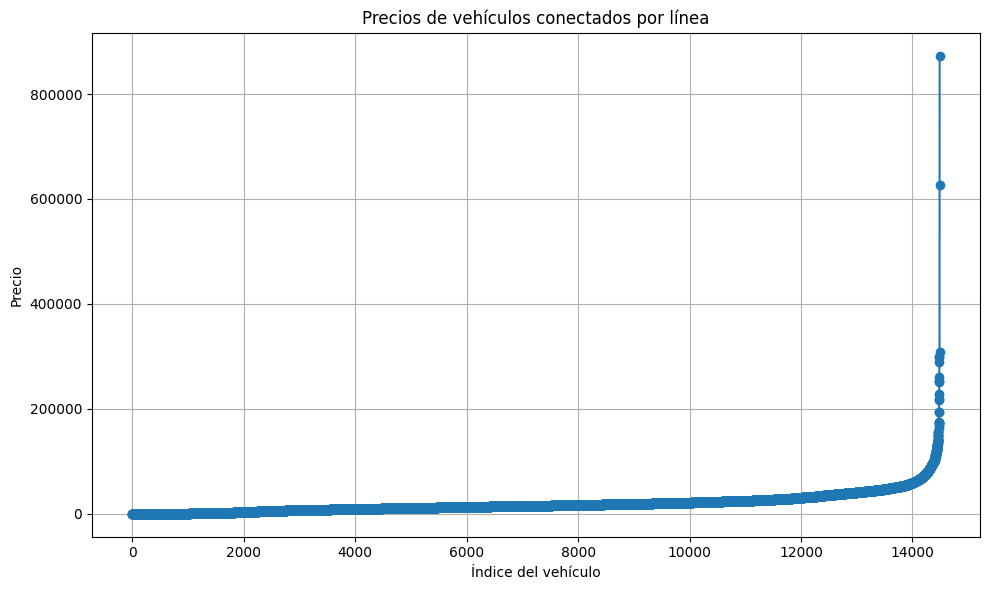

In [45]:

# Obtener los precios del DataFrame df_acotado
precios = df_acotado.sort_values('Price').reset_index()['Price']

# Crear un gráfico de puntos conectados por una línea para los precios
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

# Crear el gráfico de línea para los precios
plt.plot(precios, marker='o', linestyle='-')

# Agregar etiquetas y título al gráfico
plt.xlabel('Índice del vehículo')  # Puedes personalizar la etiqueta del eje x
plt.ylabel('Precio')  # Puedes personalizar la etiqueta del eje y
plt.title('Precios de vehículos conectados por línea')  # Título del gráfico

# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula si es necesario
plt.tight_layout()  # Ajustar el diseño automáticamente
plt.show()

In [46]:
df_acotado[df_acotado['Price']>40000]

,Price,Prod. year,Engine volume,Cylinders,Airbags,Manufacturer_map,Model_map,Category_map,Leather interior_map,Fuel type_map,Gear box type_map,Color_map,Drive wheels_map,Doors_map
14,59464,2016,2.0,4.0,4,6,107,10,0,6,0,8,0,5
36,51746,2019,2.0,4.0,12,29,42,10,1,1,1,15,0,5
41,45734,2016,2.5,4.0,4,6,1136,4,0,6,0,2,0,5
47,55390,2017,2.0,4.0,4,6,107,10,0,6,0,2,0,5
56,87112,2019,2.0,4.0,0,51,535,10,0,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,56814,2017,2.0,4.0,4,6,699,3,0,1,0,2,0,5
19161,64290,2012,3.5,6.0,12,10,73,10,0,0,3,2,1,5
19175,42883,2015,2.4,4.0,4,34,225,10,0,1,0,8,0,5
19180,63886,2020,2.0,4.0,4,6,699,3,0,3,0,6,0,5


In [47]:
df_acotado[(df_acotado['Price']>20000) & (df_acotado['Price']<40000) ]

,Price,Prod. year,Engine volume,Cylinders,Airbags,Manufacturer_map,Model_map,Category_map,Leather interior_map,Fuel type_map,Gear box type_map,Color_map,Drive wheels_map,Doors_map
5,39493,2016,2.0,4.0,4,6,107,10,0,6,0,8,0,5
9,26657,2007,3.5,6.0,12,10,1257,10,0,1,0,6,1,5
17,28382,2016,1.8,4.0,4,6,984,3,0,1,0,8,0,5
21,20698,2012,1.8,4.0,12,29,49,3,0,4,0,8,0,5
25,20385,2006,2.2,4.0,8,51,79,3,0,6,1,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19207,22197,2012,1.5,4.0,4,29,1507,1,0,1,0,2,0,5
19208,34811,2013,2.5,4.0,6,29,1412,10,1,1,1,0,0,5
19216,37633,2017,2.5,4.0,12,29,1412,10,0,1,1,12,0,5
19217,26017,2009,3.5,4.0,4,10,157,3,0,1,0,8,0,5


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [49]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],      # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10]   # Número mínimo de muestras requeridas para dividir un nodo
}

In [50]:
scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)

In [51]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(r2_score), verbose=1)

In [52]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Best R-squared:", r2)

Best R-squared: 0.5426890736687764


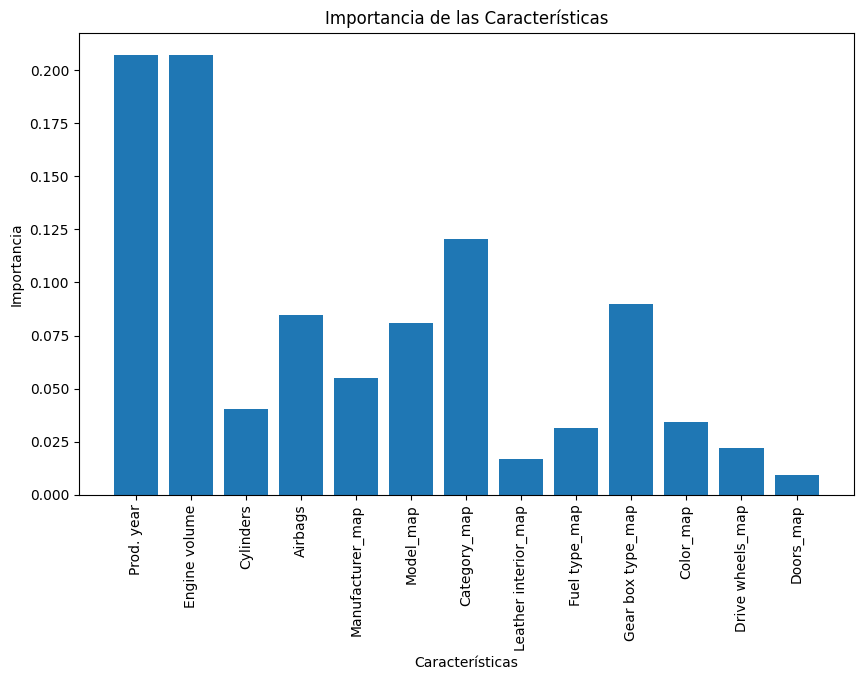

In [54]:
features = df_acotado.drop('Price', axis=1)  # Elimina la columna 'target' para obtener las características

target = df_acotado['Price']

importances = best_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(features.columns, importances)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejorar la legibilidad
plt.show()

In [55]:
df_acotado2 = df_acotado.drop(['Leather interior_map','Doors_map','Drive wheels_map','Color_map','Fuel type_map'], axis = 1)

In [59]:
X = df_acotado2.drop('Price',axis=1).values
y = df_acotado2['Price'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)


In [61]:
lb.train_linear_regression(X_train,X_test,y_train,y_test)
lb.train_polynomial_regression(X_train,X_test,y_train,y_test)
lb.train_ridge_regression(X_train,X_test,y_train,y_test)
lb.train_lasso_regression(X_train,X_test,y_train,y_test)
lb.train_elasticnet_regression(X_train,X_test,y_train,y_test)
lb.train_knn_regression(X_train,X_test,y_train,y_test)
lb.train_decision_tree_regression(X_train,X_test,y_train,y_test)
lb.train_random_forest_regression(X_train,X_test,y_train,y_test)
lb.train_svr_regression(X_train,X_test,y_train,y_test)

Linear Regression Metrics:
Mean Squared Error: 292523689.38204324
Mean Absolute Error: 10690.721483734264
R^2 Score: 0.23991079705198792
---------------------------------
Métricas del modelo de regresión polinomial:
Grado del polinomio: 2
Error cuadrático medio (MSE) - Conjunto de entrenamiento: 289587290.13
Error cuadrático medio (MSE) - Conjunto de prueba: 249848769.80
Error absoluto medio (MAE) - Conjunto de entrenamiento: 9579.98
Error absoluto medio (MAE) - Conjunto de prueba: 9688.67
Coeficiente de determinación (R^2) - Conjunto de entrenamiento: 0.36
Coeficiente de determinación (R^2) - Conjunto de prueba: 0.35
Ridge Regression (alpha=1.0) Metrics:
Mean Squared Error: 292539763.85625666
Mean Absolute Error: 10683.921647259434
R^2 Score: 0.23986902937731347
---------------------------------
Lasso Regression (alpha=1.0) Metrics:
Mean Squared Error: 292516727.84684134
Mean Absolute Error: 10688.077431598742
R^2 Score: 0.23992888580149763
---------------------------------
ElasticNet

In [62]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],      # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10]   # Número mínimo de muestras requeridas para dividir un nodo
}
scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Best R-squared:", r2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best R-squared: 0.5209796009463703
